In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
print("=== Dataset Info ===")
print(df.info())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
print("\n=== Summary Statistics ===")
print(df.describe())


=== Summary Statistics ===
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [9]:
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


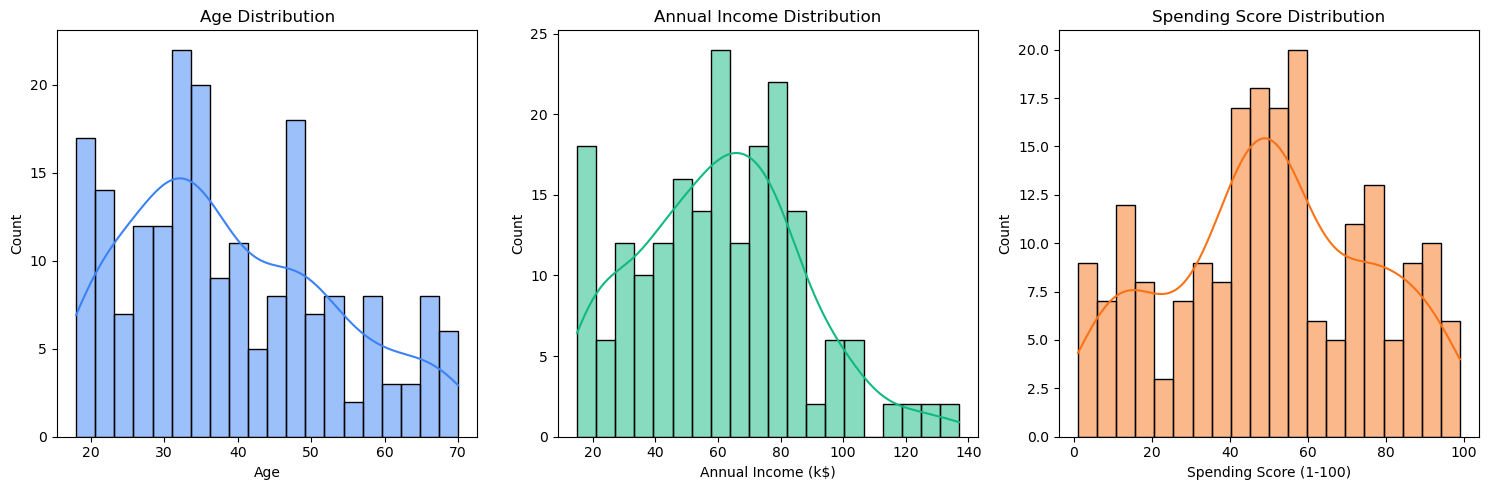

In [13]:
# Distribution plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='#3b82f6')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='#10b981')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='#f97316')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


=== Gender Distribution ===
Gender
Female    112
Male       88
Name: count, dtype: int64


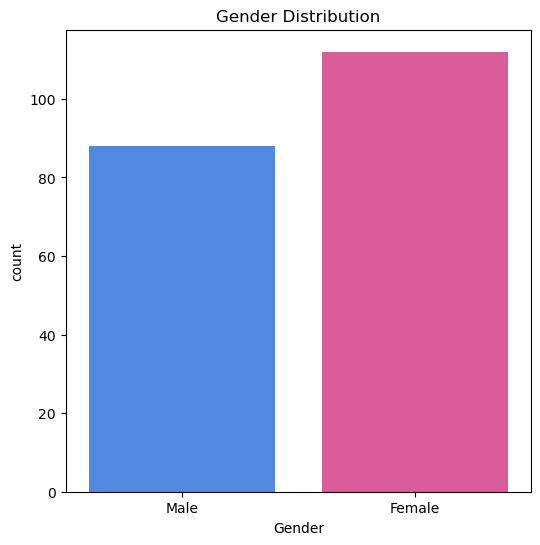

In [15]:
# Gender distribution
print("\n=== Gender Distribution ===")
print(df['Gender'].value_counts())

# Visualize gender
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df, palette=['#3b82f6', '#ec4899'])
plt.title('Gender Distribution')
plt.show()

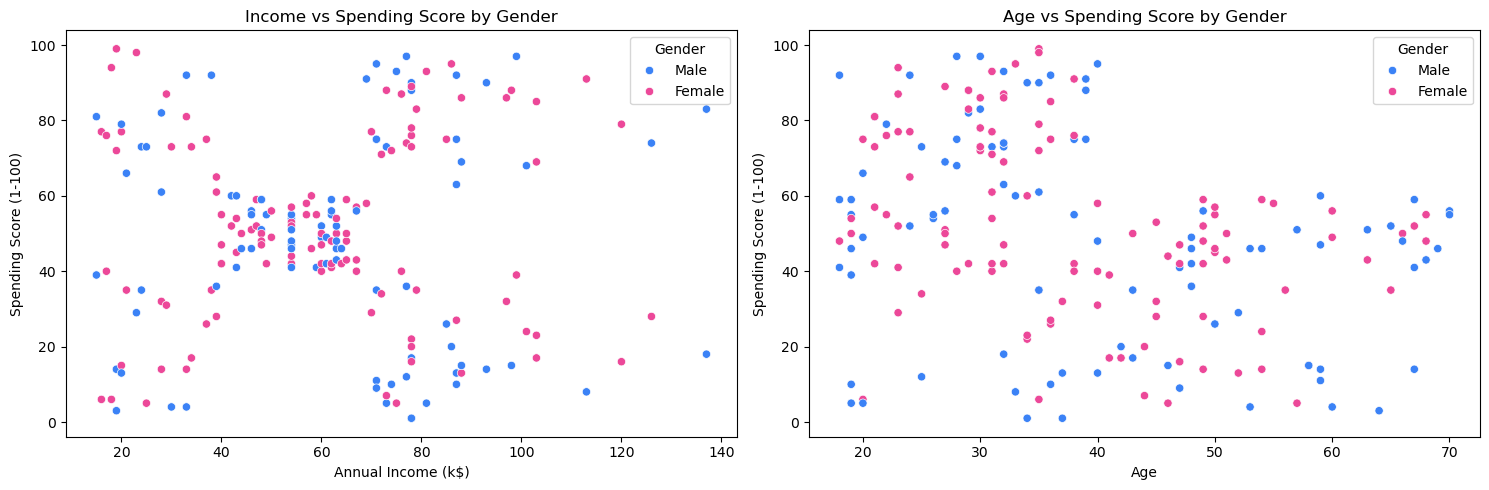

In [19]:
# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, palette=['#3b82f6', '#ec4899'])
plt.title('Income vs Spending Score by Gender')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df, palette=['#3b82f6', '#ec4899'])
plt.title('Age vs Spending Score by Gender')

plt.tight_layout()
plt.show()



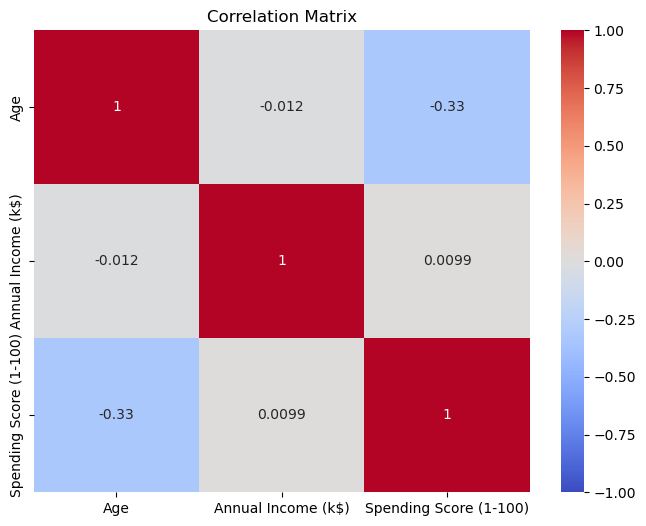

In [21]:
# Correlation matrix (numeric columns only)
numeric_data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
# Step 1: Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [29]:
# Step 2: Preprocess the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

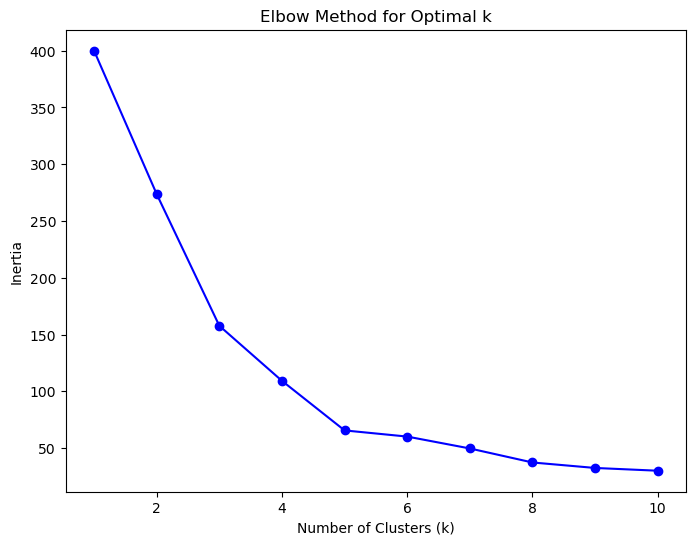

In [31]:
# Step 3: Elbow method to find optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [33]:
# Step 4: Fit K-Means with optimal number of clusters (e.g., 5)
optimal_k = 5  # Often 5 based on elbow method for this dataset
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [35]:
# Step 5: Add cluster labels to the original dataset
df['Cluster'] = clusters

In [37]:
# Step 6: Print cluster centers (in original scale)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Annual Income (k$), Spending Score):")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: Income = {center[0]:.2f} k$, Spending Score = {center[1]:.2f}")

Cluster Centers (Annual Income (k$), Spending Score):
Cluster 0: Income = 55.30 k$, Spending Score = 49.52
Cluster 1: Income = 86.54 k$, Spending Score = 82.13
Cluster 2: Income = 25.73 k$, Spending Score = 79.36
Cluster 3: Income = 88.20 k$, Spending Score = 17.11
Cluster 4: Income = 26.30 k$, Spending Score = 20.91


In [39]:
# Step 7: Save the clustered data
df.to_csv("Mall_Customers_Clustered.csv", index=False)
print("\nClustered data saved to 'Mall_Customers_Clustered.csv'")


Clustered data saved to 'Mall_Customers_Clustered.csv'
